In [1]:
import numpy
import math
def generate_golden_angles( N, first_angle = None ):

   if first_angle is None:
      first_angle = math.pi / 2.0

   # Golden ratio:
   ratio = 2.0 * math.pi / ( 1.0 + ( 5.0 ** 0.5 ) )

   # Generate angles:
   angles = []
   for J in range( N ):
      angles.append( ratio * J + first_angle )

   # Constrain to ( pi/4, 5pi / 4]:
   for J in range( N ):
      curr_angle = angles[ J ] - ( math.pi / 4.0 )
      mul = int( curr_angle / math.pi )
      curr_angle -= mul * math.pi
      if curr_angle <= 0.0:
         curr_angle += math.pi
      angles[ J ] = curr_angle + ( math.pi / 4.0 )

   angles.sort()

   return angles

def generate_samples( M, angles, sigma = None, return_complex = True ):

   if isinstance( angles, ( int, float ) ):
      angles = generate_golden_angles( angles )

   if sigma is None:
      sigma = math.pi / M

   delta = 2.0 * math.pi / M

   xi = numpy.zeros( ( M, len( angles ) ) )
   upsilon = numpy.zeros( ( M, len( angles ) ) )

   for j in range( len( angles ) ):
      if ( abs( math.sin( angles[ j ] ) ) > abs( math.cos( angles[ j ] ) ) ) and \
         ( angles[ j ] <= 3.0 * math.pi / 4.0 ):
         # "Vertical" angles:
         ct = math.cos( angles[ j ] ) / math.sin( angles[ j ] )
         for i in range( M ):
            upsilon[ i, j ] = math.pi - delta * i - sigma
            xi[ i, j ] = upsilon[ i, j ] * ct

      else:
         # "Horizontal" angles:
         tg = math.tan( angles[ j ] )
         for i in range( M ):
            xi[ i, j ] = -math.pi + delta * i + sigma
            upsilon[ i, j ] = xi[ i, j ] * tg

   if return_complex:
      return ( upsilon + 1j * xi ) / ( 2.0 * math.pi )
   else:
      return ( xi, upsilon )


In [2]:
N = 4
a = generate_golden_angles(N)
print(a)
M = 4
xi = generate_samples(M, a)
print(xi)

[1.1124441357917094, 1.5707963267948966, 2.312425750656036, 3.512407365520363]
[[ 0.375     +1.85024305e-01j  0.375     +2.29621275e-17j
   0.375     -3.43530718e-01j -0.14580028-3.75000000e-01j]
 [ 0.125     +6.16747682e-02j  0.125     +7.65404249e-18j
   0.125     -1.14510239e-01j -0.04860009-1.25000000e-01j]
 [-0.125     -6.16747682e-02j -0.125     -7.65404249e-18j
  -0.125     +1.14510239e-01j  0.04860009+1.25000000e-01j]
 [-0.375     -1.85024305e-01j -0.375     -2.29621275e-17j
  -0.375     +3.43530718e-01j  0.14580028+3.75000000e-01j]]


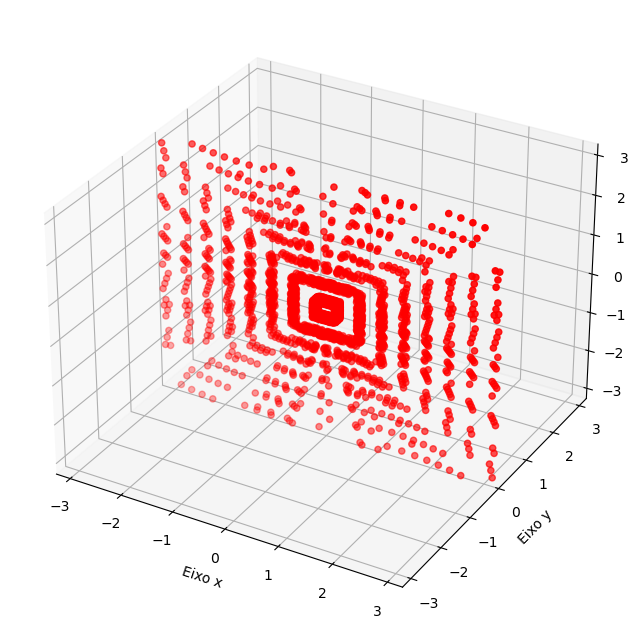

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def generate_golden_angles_3D(N):
    # Definir as razões áureas ajustadas
    phi1, phi2 = 0.4656, 0.6823

    # Calcular ângulos e coordenadas no espaço 3D
    N_valores = np.arange(1, N)
    beta = np.arccos(np.mod(N_valores * phi1, 1))
    alpha = 2 * np.pi * np.mod(N_valores * phi2, 1)

    # Coordenadas na esfera
    xi = np.sin(beta) * np.cos(alpha)
    nu = np.sin(beta) * np.sin(alpha)
    mu = np.cos(beta)

    return xi, nu, mu

 
# Normalizar para o cubo [-pi, pi]
def normalize_to_cube(x, y, z):
    norm = np.maximum.reduce([np.abs(x), np.abs(y), np.abs(z)])
    return x / norm, y / norm, z / norm


def interpolacao_pontos(M, x1, y1, z1, x2, y2, z2):
    I = np.linspace(0, 1, M+1)
    k_x = x1[:, None] + (x2 - x1)[:, None] * I
    k_y = y1[:, None] + (y2 - y1)[:, None] * I
    k_z = z1[:, None] + (z2 - z1)[:, None] * I
    return k_x, k_y, k_z


# Geração e normalização de pontos
xi, nu, mu = generate_golden_angles_3D(2000)  # Na superfície esférica
xi, nu, mu = normalize_to_cube(xi, nu, mu)    # Na superfície do cubo
xi_o, nu_o, mu_o = -xi, -nu, -mu              # Ponto oposto

# Ajuste para o cubo [-pi, pi]
xi, nu, mu = xi * np.pi, nu * np.pi, mu * np.pi
xi_o, nu_o, mu_o = xi_o * np.pi, nu_o * np.pi, mu_o * np.pi

# Interpolação de pontos
k_x, k_y, k_z = interpolacao_pontos(15, xi, nu, mu, xi_o, nu_o, mu_o)

# Filtrar pontos onde y ≈ 0 (com um pequeno intervalo para considerar precisão numérica)
epsilon = 1e-1
idx_y_zero = np.abs(k_y) < epsilon

# Plotar apenas os pontos onde y ≈ 0
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(k_x[idx_y_zero], k_y[idx_y_zero], k_z[idx_y_zero], color='red')

# Definir os limites do gráfico
ax.set(xlim=(-np.pi, np.pi), ylim=(-np.pi, np.pi), zlim=(-np.pi, np.pi),
       xlabel="Eixo x", ylabel="Eixo y", zlabel="Eixo z")

plt.show()


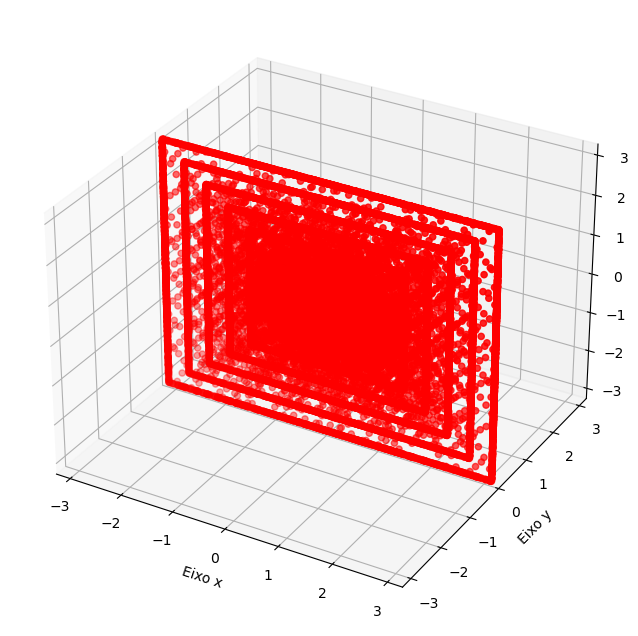

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def generate_golden_angles_3D(N):
    # Definir as razões áureas ajustadas
    phi1, phi2 = 0.4656, 0.6823

    # Calcular ângulos e coordenadas no espaço 3D
    N_valores = np.arange(1, N)
    beta = np.arccos(np.mod(N_valores * phi1, 1))
    alpha = 2 * np.pi * np.mod(N_valores * phi2, 1)

    # Coordenadas na esfera
    xi = np.sin(beta) * np.cos(alpha)
    nu = np.sin(beta) * np.sin(alpha)
    mu = np.cos(beta)

    return xi, nu, mu

 
# Normalizar para o cubo [-pi, pi]
def normalize_to_cube(x, y, z):
    norm = np.maximum.reduce([np.abs(x), np.abs(y), np.abs(z)])
    return x / norm, y / norm, z / norm


def interpolacao_pontos(M, x1, y1, z1, x2, y2, z2):
    I = np.linspace(0, 1, M+1)
    k_x = x1[:, None] + (x2 - x1)[:, None] * I
    k_y = y1[:, None] + (y2 - y1)[:, None] * I
    k_z = z1[:, None] + (z2 - z1)[:, None] * I
    return k_x, k_y, k_z


# Geração e normalização de pontos
xi, nu, mu = generate_golden_angles_3D(2000)  # Na superfície esférica
xi, nu, mu = normalize_to_cube(xi, nu, mu)    # Na superfície do cubo
xi_o, nu_o, mu_o = -xi, -nu, -mu              # Ponto oposto

# Ajuste para o cubo [-pi, pi]
xi, nu, mu = xi * np.pi, nu * 0, mu * np.pi
xi_o, nu_o, mu_o = xi_o * np.pi, nu_o * 0, mu_o * np.pi

# Interpolação de pontos
k_x, k_y, k_z = interpolacao_pontos(15, xi, nu, mu, xi_o, nu_o, mu_o)

# Filtrar pontos onde y ≈ 0 (com um pequeno intervalo para considerar precisão numérica)
epsilon = 1e-1
idx_y_zero = np.abs(k_y) < epsilon

# Plotar apenas os pontos onde y ≈ 0
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(k_x, k_y, k_z, color='red')

# Definir os limites do gráfico
ax.set(xlim=(-np.pi, np.pi), ylim=(-np.pi, np.pi), zlim=(-np.pi, np.pi),
       xlabel="Eixo x", ylabel="Eixo y", zlabel="Eixo z")

plt.show()


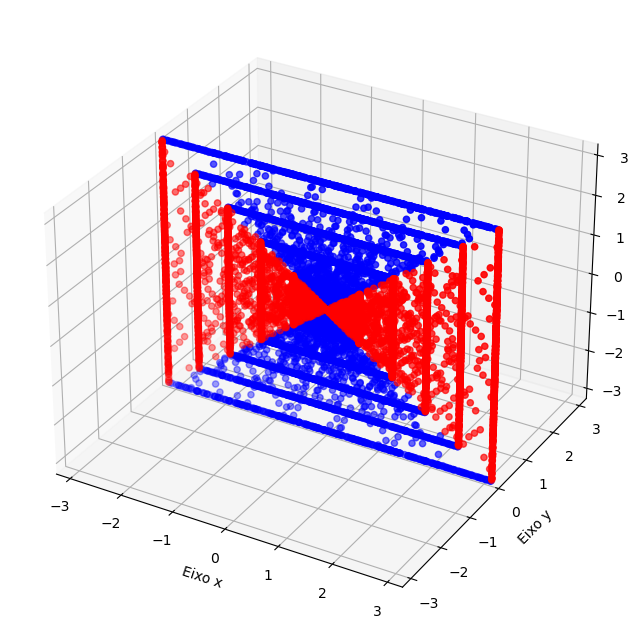

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Definir as razões áureas ajustadas
phi1, phi2 = 0.4656, 0.6823

# Número de amostras
m_values = np.arange(1, 1000)

# Calcular ângulos e coordenadas no espaço 3D
beta = np.arccos(np.mod(m_values * phi1, 1))
alpha = 2 * np.pi * np.mod(m_values * phi2, 1)

k_x1, k_y1, k_z1 = np.sin(beta) * np.cos(alpha), np.sin(beta) * np.sin(alpha), np.cos(beta)
k_x2, k_y2, k_z2 = -k_x1, -k_y1, -k_z1

# Normalizar para o cubo [-pi, pi]
def normalize_to_cube(x, y, z):
    norm = np.maximum.reduce([np.abs(x), np.abs(y), np.abs(z)])
    return x / norm, y / norm, z / norm

k_x1, k_y1, k_z1 = normalize_to_cube(k_x1, k_y1, k_z1)
k_x2, k_y2, k_z2 = normalize_to_cube(k_x2, k_y2, k_z2)

k_x1, k_y1, k_z1 = k_x1 * np.pi, k_y1 * 0, k_z1 * np.pi
k_x2, k_y2, k_z2 = k_x2 * np.pi, k_y2 * 0, k_z2 * np.pi

# Interpolação de pontos
M = 10
I = np.linspace(0, 1, M+1)
k_x = k_x1[:, None] + (k_x2 - k_x1)[:, None] * I
k_y = k_y1[:, None] + (k_y2 - k_y1)[:, None] * I
k_z = k_z1[:, None] + (k_z2 - k_z1)[:, None] * I

# Aplicar as pirâmides duplas ortogonais
def assign_to_pyramids(x, y, z):
    return 'F' if np.abs(x) >= np.abs(y) and np.abs(x) >= np.abs(z) else ('G' if np.abs(y) >= np.abs(x) and np.abs(y) >= np.abs(z) else 'H')

labels = np.array([assign_to_pyramids(x, y, z) for x, y, z in zip(k_x.flatten(), k_y.flatten(), k_z.flatten())])

# Plotagem
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

colors = {'F': 'red', 'G': 'green', 'H': 'blue'}
for label in np.unique(labels):
    idx = labels == label
    ax.scatter(k_x.flatten()[idx], k_y.flatten()[idx], k_z.flatten()[idx], color=colors[label])

ax.set(xlim=(-np.pi, np.pi), ylim=(-np.pi, np.pi), zlim=(-np.pi, np.pi),
       xlabel="Eixo x", ylabel="Eixo y", zlabel="Eixo z")

#plt.savefig('AD-3D-LINO.pdf')
plt.show()
